In [31]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [32]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split

#predicting the probability of a binary outcome using the logistic function
from sklearn.linear_model import LogisticRegression

#c measuring the proportion of correctly classified instances in a classification model
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

In [33]:
#loarding data set
data = pd.read_csv("diabetes.csv")

In [34]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

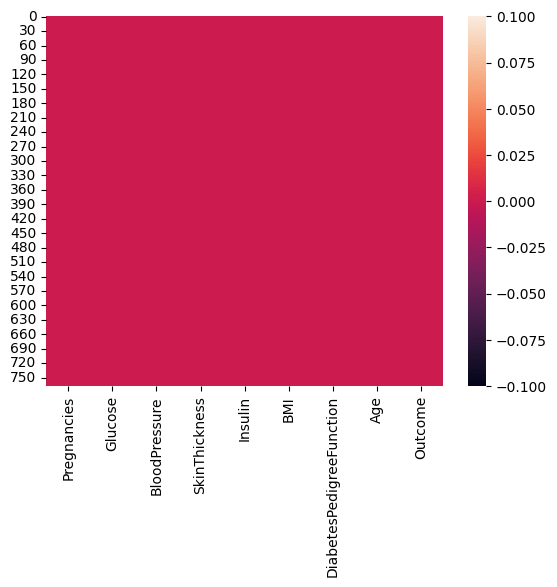

In [35]:
#checking for missing values
sns.heatmap(data.isnull())

In [36]:
#co relation matrix
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

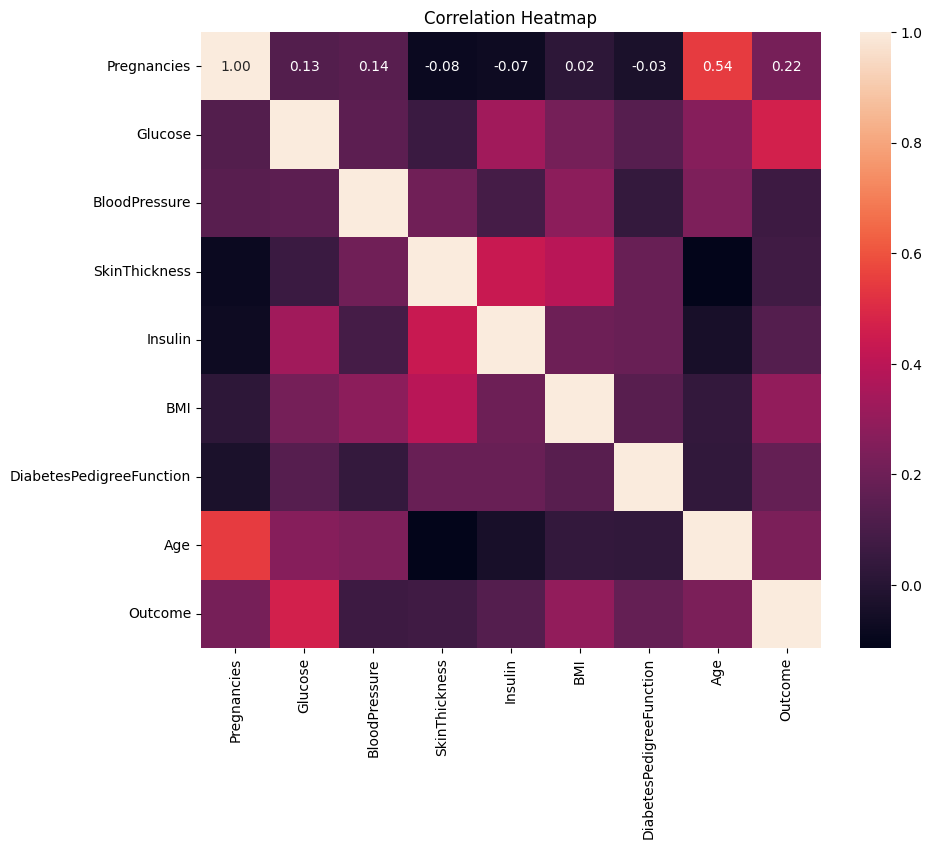

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
#train test split
X = data.drop("Outcome",axis = 1)
Y = data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Logisitic Regression

In [39]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [40]:
prediction = model.predict(X_test)

In [41]:
print(prediction)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 0 1]


In [42]:
accuracy = accuracy_score(prediction,Y_test)

In [43]:
print(accuracy)

0.7857142857142857


In [44]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression with cross-validation
lr_model = LogisticRegression(max_iter=1000)
lr_accuracies = cross_val_score(lr_model, X, Y, cv=10)  # 10-fold cross-validation

# Display cross-validation accuracies and the best accuracy
print("Logistic Regression Cross-Validation Accuracies:", lr_accuracies)
print("Best Logistic Regression Accuracy:", max(lr_accuracies))


Logistic Regression Cross-Validation Accuracies: [0.72727273 0.77922078 0.80519481 0.71428571 0.75324675 0.76623377
 0.80519481 0.80519481 0.75       0.82894737]
Best Logistic Regression Accuracy: 0.8289473684210527


# Logistic Regression with improvements

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Loading dataset
data = pd.read_csv("diabetes.csv")

# Train-test split
X = data.drop("Outcome", axis=1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, Y_train)

# Best model
best_model = grid.best_estimator_
prediction = best_model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(Y_test, prediction)

# Output
print("Best Hyperparameters:", grid.best_params_)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.7532467532467533


# Random Forest

In [47]:
# # Importing the Random Forest classifier
# from sklearn.ensemble import RandomForestClassifier

# # Training the Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, Y_train)

# # Making predictions
# rf_predictions = rf_model.predict(X_test)

# # Calculating accuracy
# rf_accuracy = accuracy_score(rf_predictions, Y_test)

# # Displaying predictions and accuracy
# print(rf_predictions)
# print(rf_accuracy)

# # Save the trained Random Forest model to a file
# # joblib.dump(rf_model, 'rf_trained_model.joblib')


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with cross-validation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracies = cross_val_score(rf_model, X, Y, cv=10)  # 10-fold cross-validation

# Display cross-validation accuracies and the best accuracy
print("Random Forest Cross-Validation Accuracies:", rf_accuracies)
print("Best Random Forest Accuracy:", max(rf_accuracies))


Random Forest Cross-Validation Accuracies: [0.7012987  0.80519481 0.72727273 0.66233766 0.74025974 0.80519481
 0.79220779 0.84415584 0.69736842 0.80263158]
Best Random Forest Accuracy: 0.8441558441558441


# Decision Tree

In [49]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Training the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, Y_train)

# # Making predictions
# dt_predictions = dt_model.predict(X_test)

# # Calculating accuracy
# dt_accuracy = accuracy_score(dt_predictions, Y_test)

# # Displaying predictions and accuracy
# print("Decision Tree Predictions:", dt_predictions)
# print("Decision Tree Accuracy:", dt_accuracy)

# # Save the trained Decision Tree model
# # joblib.dump(dt_model, 'dt_trained_model.joblib')


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Decision Tree with cross-validation
dt_model = DecisionTreeClassifier(random_state=42)
dt_accuracies = cross_val_score(dt_model, X, Y, cv=10)  # 10-fold cross-validation

# Display cross-validation accuracies and the best accuracy
print("Decision Tree Cross-Validation Accuracies:", dt_accuracies)
print("Best Decision Tree Accuracy:", max(dt_accuracies))


Decision Tree Cross-Validation Accuracies: [0.67532468 0.72727273 0.67532468 0.5974026  0.68831169 0.67532468
 0.80519481 0.76623377 0.65789474 0.75      ]
Best Decision Tree Accuracy: 0.8051948051948052


# Stack Ensemble (Final Model)

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Load the Pima Indian Diabetes dataset
data = pd.read_csv("diabetes.csv")

# Features and target variable
X = data.drop("Outcome", axis=1)
Y = data['Outcome']

# Base learners
base_learners = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Meta-model (XGBClassifier)
meta_model = XGBClassifier(eval_metric='logloss')

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Apply cross-validation
cv_scores = cross_val_score(stacking_model, X, Y, cv=20, scoring='accuracy') # 20-fold cross-validation

# Display cross-validation results and the best accuracy
print("Cross-validation Accuracy Scores for Stacking Model:", cv_scores)
print("Best Stacking Model Accuracy:", max(cv_scores))


Cross-validation Accuracy Scores for Stacking Model: [0.56410256 0.66666667 0.79487179 0.92307692 0.82051282 0.58974359
 0.74358974 0.69230769 0.76315789 0.76315789 0.73684211 0.73684211
 0.68421053 0.76315789 0.73684211 0.86842105 0.73684211 0.73684211
 0.73684211 0.78947368]
Best Stacking Model Accuracy: 0.9230769230769231


# Evaluation Metrics

Count of each class in the Outcome column:
Outcome
0    500
1    268
Name: count, dtype: int64


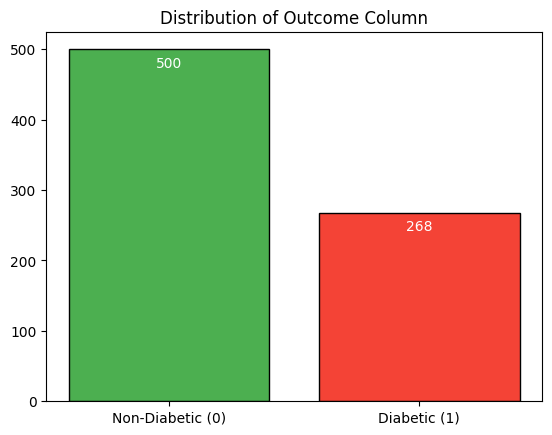

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Count the occurrences of each value in the 'Outcome' column
outcome_counts = data['Outcome'].value_counts()

# Display the counts
print("Count of each class in the Outcome column:")
print(outcome_counts)

# Plot the bar chart with specified bar colors
plt.bar(outcome_counts.index, outcome_counts.values, color=['#4CAF50', '#F44336'], edgecolor='black')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'])
plt.title("Distribution of Outcome Column")

# Add value labels inside the bars
for i, value in enumerate(outcome_counts.values):
    plt.text(i, value - 20, str(value), color='white', ha='center', va='center', fontsize=10)

plt.show()


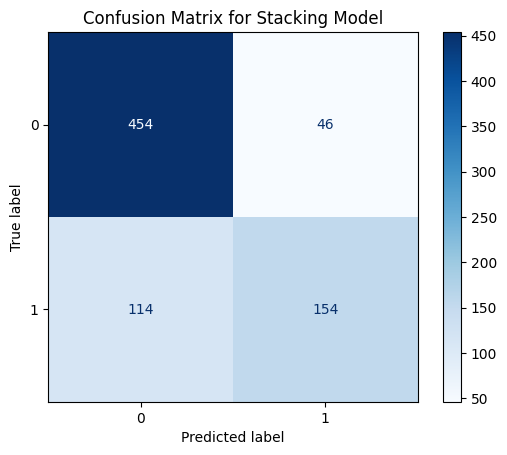

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit the stacking model
stacking_model.fit(X, Y)

# Predict the outcomes
y_pred = stacking_model.predict(X)

# Generate confusion matrix
cm = confusion_matrix(Y, y_pred)

# Display confusion matrix with a title
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_model.classes_)
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Stacking Model")
plt.show()


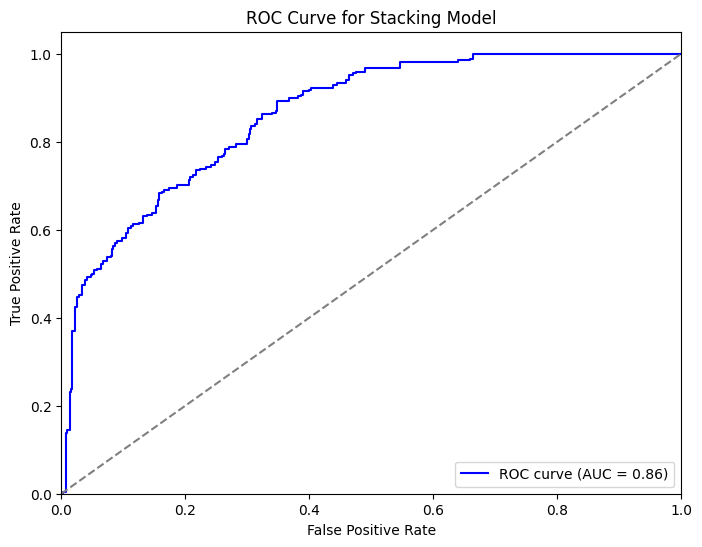

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the stacking model
stacking_model.fit(X, Y)

# Predict probabilities for the ROC curve
y_prob = stacking_model.predict_proba(X)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y, y_prob)

# Compute AUC score
auc_score = roc_auc_score(Y, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Model')
plt.legend(loc='lower right')
plt.show()


In [55]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit the stacking model
stacking_model.fit(X, Y)

# Predict the outcomes
y_pred = stacking_model.predict(X)

# Calculate Precision, Recall, and F1-score
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)

# Create a DataFrame to display the results
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score'],
    'Value': [precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)


      Metric     Value
0  Precision  0.770000
1     Recall  0.574627
2   F1-score  0.658120


In [56]:
from sklearn.metrics import classification_report

# Fit the ensemble model (stacking_model)
stacking_model.fit(X, Y)

# Predict the outcomes
y_pred = stacking_model.predict(X)

# Generate the classification report with meaningful labels
report = classification_report(Y, y_pred, target_names=['Non-Diabetic', 'Diabetic'])

# Display the classification report
print("Classification Report for Ensemble Model:")
print(report)


Classification Report for Ensemble Model:
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.91      0.85       500
    Diabetic       0.77      0.57      0.66       268

    accuracy                           0.79       768
   macro avg       0.78      0.74      0.75       768
weighted avg       0.79      0.79      0.78       768



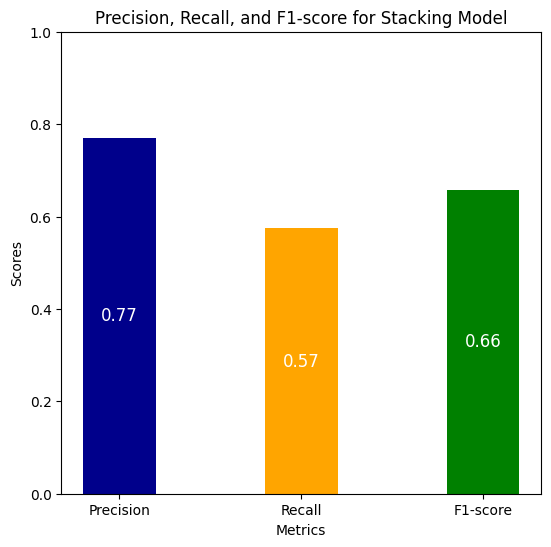

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit the stacking model
stacking_model.fit(X, Y)

# Predict the outcomes
y_pred = stacking_model.predict(X)

# Calculate Precision, Recall, and F1-score
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)

# Metrics for plotting
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

# Plot the metrics in a bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['darkblue', 'orange', 'green'], width=0.4)  # Reduced bar width

# Add values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval:.2f}', ha='center', va='center', color='white', fontsize=12)

# Adjust spacing between bars
plt.subplots_adjust(left=0.2, right=0.8)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score for Stacking Model')
plt.ylim([0, 1])
plt.show()


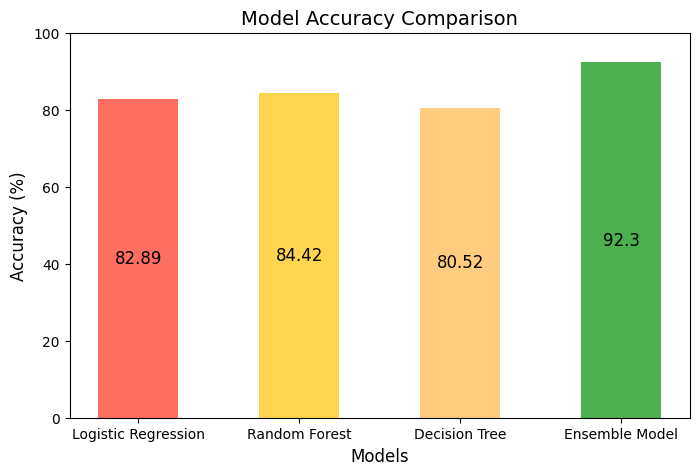

In [58]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Ensemble Model']
accuracies = [82.89, 84.42, 80.52, 92.30]

colors = ["#FF6F61", "#FFD54F", "#FFCC80", "#4CAF50"]

# Plotting with adjusted bar width
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=colors, width=0.5)

# Adding titles and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

plt.ylim(0, 100)

# Display values in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 2), 
             ha='center', va='center', color='black', fontsize=12)

# Display the plot
plt.show()
